# ECBM E4040 - MECH - AlexNet Training Script

In [1]:
##### Import libraries
%matplotlib inline
%load_ext autoreload
%autoreload 2

from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import tensorflow as tf
from imageGen import ImageGenerator
from utils import *


In [2]:
# # Load Training Data
load_data()
allData, allLabels = process_crop_data()

print("Resizing data ...")
allDatatmp = np.zeros((allData.shape[0],66,200,3))
for i in range(allData.shape[0]):#allData.shape[0]):
    allDatatmp[i,:,:,:] = misc.imresize(allData[i,:,:,:],(66,200),mode='RGB')
    if(i%1000==0):
        print(str(i/allData.shape[0]*100)+'%')
    
allData = allDatatmp
steerCol = 4
allLabels = allLabels[:allData.shape[0],steerCol]
print(allData.shape)
print(allLabels.shape)
del allDatatmp

Data extracted!
Loading Cropped Data...
Loading imageArray_Ardagh-City_1513488313.68.npy Images...
Loading imageArray_Dobs-City_1513486244.82.npy Images...
Loading imageArray_E-Road_1513485049.18.npy Images...
Loading imageArray_E-Track5_1513481723.24.npy Images...
Loading imageArray_Kaaitara-City_1513487266.5.npy Images...
Loading Cropped Labels...
Loading labelsArray_Ardagh-City_1513488313.68.npy Labels...
Loading labelsArray_Dobs-City_1513486244.82.npy Labels...
Loading labelsArray_E-Road_1513485049.18.npy Labels...
Loading labelsArray_E-Track5_1513481723.24.npy Labels...
Loading labelsArray_Kaaitara-City_1513487266.5.npy Labels...
Data loaded!
Resizing data ...
0.0%
6.666666666666667%
13.333333333333334%
20.0%
26.666666666666668%
33.33333333333333%
40.0%
46.666666666666664%
53.333333333333336%
60.0%
66.66666666666666%
73.33333333333333%
80.0%
86.66666666666667%
93.33333333333333%
(15000, 66, 200, 3)
(15000,)


In [3]:
# Randomize
num_samples = allData.shape[0]
num_val_samples = np.floor(0.08*num_samples).astype(int)
print(num_samples)
print(num_val_samples)

randidx = np.arange(num_samples)
np.random.shuffle(randidx)
idxval = randidx[:num_val_samples]
idxtrain = randidx[num_val_samples:]

# Partition Training to Construct Validation
X_val = allData[idxval,:,:,:]
y_val = allLabels[idxval,]
X_train = allData[idxtrain,:,:,:]
y_train = allLabels[idxtrain,]
randidx = np.arange(X_train.shape[0])
num_test_samples = np.floor(X_train.shape[0]*.4).astype(np.int);
np.random.shuffle(randidx)
idxtst = randidx[:num_test_samples]
idxtrain = randidx[num_test_samples:]

X_test = X_train[idxtst,:,:,:]
y_test = y_train[idxtst]
X_train = X_train[idxtrain,:,:,:]
y_train = y_train[idxtrain]

# Print Set Information
print('Validation set size is {}'.format(X_val.shape))
print('Validation Label size is {}'.format(y_val.shape))
print('Testing set size is {}'.format(X_test.shape))        
print('Test Label is of size {}'.format(y_test.shape))
print('Training set size is {}'.format(X_train.shape))        
print('Train Label is of size {}'.format(y_train.shape))
del allData
del allLabels

15000
1200
Validation set size is (1200, 66, 200, 3)
Validation Label size is (1200,)
Testing set size is (5520, 66, 200, 3)
Test Label is of size (5520,)
Training set size is (8280, 66, 200, 3)
Train Label is of size (8280,)


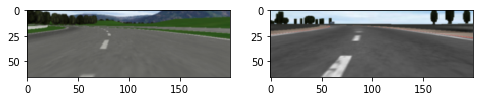

In [4]:
# Visualize Images and Check Data
f, axarr = plt.subplots(1,2,figsize=(8,8))
axarr[0].imshow(X_train[2999,:,:,:].astype(np.uint8))
axarr[1].imshow(X_train[10,:,:,:].astype(np.uint8))

In [5]:
# YOUR CODE HERE
# CNN Based on AlexNet
# Adam Optimization w/ dropout at 0.8
tf.reset_default_graph()
from cnn import my_training_AlexNet

im_len = X_train.shape[2]

my_training_AlexNet(X_train, y_train, X_val, y_val, 
         conv_featmap=[im_len, 128],
         l2_norm=0.001,
         seed=235,
         learning_rate=.005,
         epoch=5,
         batch_size=20,
         verbose=True,
         pre_trained_model=None,
         keep_prob=0.8, im_len = im_len, ofn="anet_compare_bs20_lr005_") # Dropout Keep Probability for Regularization


Building my AlexNet. Parameters: 
conv_featmap=[200, 128]
fc_units=[84]
conv_kernel_size=[5]
pooling_size=[2]
l2_norm=0.001
seed=235
learning_rate=0.005
keep_prob=0.8
Output filename is =anet_compare_bs20_lr005_
epoch 1 
220/8280 loss: 2.1551766395568848; val loss : [2.1312151], tr loss : 2.1306769847869873
Best validation loss! iteration:10 loss: [2.1312151]
420/8280 loss: 1.9922518730163574; val loss : [1.9828807], tr loss : 1.969045877456665
Best validation loss! iteration:20 loss: [1.9828807]
620/8280 loss: 1.8924869298934937; val loss : [1.8466016], tr loss : 1.8764352798461914
Best validation loss! iteration:30 loss: [1.8466016]
820/8280 loss: 1.7529709339141846; val loss : [1.719341], tr loss : 1.7276235818862915
Best validation loss! iteration:40 loss: [1.719341]
1020/8280 loss: 1.6073384284973145; val loss : [1.6025891], tr loss : 1.5870599746704102
Best validation loss! iteration:50 loss: [1.6025891]


KeyboardInterrupt: 

In [8]:
# YOUR CODE HERE
# CNN Based on AlexNet
# Adam Optimization w/ dropout at 0.8
tf.reset_default_graph()
from cnn import my_training_Mod_Nvid

im_len = X_train.shape[2]

my_training_Mod_Nvid(X_train,y_train, X_val, y_val,
         conv_featmap=[im_len, 128],
         l2_norm=0.001,
         seed=235,
         learning_rate=.001,
         epoch=50,
         batch_size=10,
         verbose=True,
         pre_trained_model=None,
         keep_prob=0.85, im_len = im_len, ofn="modnvid_compare_bs20_lr001_") 

Building my Mod_Nvid. Parameters: 
conv_featmap=[200, 128]
fc_units=[84]
conv_kernel_size=[5]
pooling_size=[2]
l2_norm=0.001
seed=235
learning_rate=0.001
keep_prob=0.85
number of batches for training: 828
epoch 1 
1000/8280 loss: 35.70055389404297 validation loss : 13.457718849182129, tr loss: 4.373167037963867
Best validation accuracy! iteration:100 accuracy: 13.457718849182129, tr loss: 4.373167037963867


KeyboardInterrupt: 

In [9]:
# CNN Based on NvidNet
# Adam Optimization w/ dropout at 0.8

tf.reset_default_graph()
from cnn import my_training_NvidNet

im_len = X_train.shape[1]

# Filename for saving loss history
ofn="nvidnet_bs_"+str(50)+"lr"+str(0.005)+"_"

my_training_NvidNet(X_train, y_train, X_val, y_val, 
         conv_featmap=[im_len],
         l2_norm=0.001,
         seed=235,
         learning_rate=0.005,
         epoch=5,
         batch_size=50,
         verbose=True,
         pre_trained_model=None,
         keep_prob=0.8, im_len = im_len, ofn=ofn)


Building my NvidNet. Parameters: 
conv_featmap=[66]
fc_units=[84]
conv_kernel_size=[5]
pooling_size=[2]
l2_norm=0.001
seed=235
learning_rate=0.005
keep_prob=0.8
Output filename is =nvidnet_bs_50lr0.005_
epoch 1 
550/8280 loss: 1.2340103387832642; val loss : 1.2185304164886475, tr loss : [1.2052743]
Best validation loss! iteration:10 loss: 1.2185304164886475
1050/8280 loss: 1.1114646196365356; val loss : 1.1023911237716675, tr loss : [1.0890771]
Best validation loss! iteration:20 loss: 1.1023911237716675
1550/8280 loss: 1.0098435878753662; val loss : 1.0009182691574097, tr loss : [0.99380964]
Best validation loss! iteration:30 loss: 1.0009182691574097


KeyboardInterrupt: 

## Save your best model

INFO:tensorflow:Restoring parameters from model/best_model
test error: 0.0224557644391
Left Turn Prediction is [-0.06570873]
Left Turn Actual is -1.0
Right Turn Prediction is [-0.00643784]
Right Turn Actual is -0.007564132536153218
Sharp Left Prediction is [ 0.01229995]
Sharp Left Actual is -0.029924709216939193


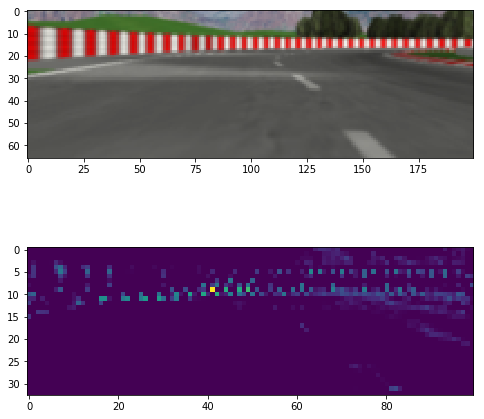

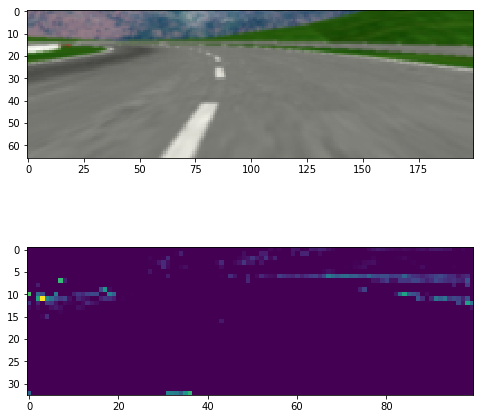

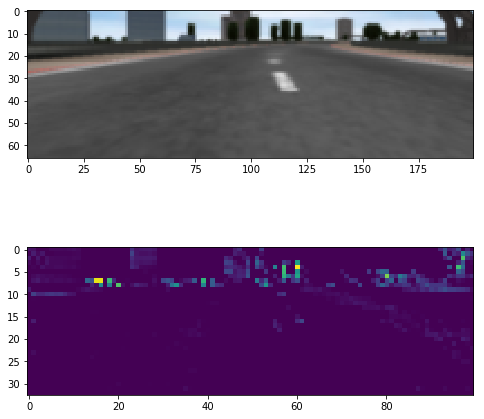

In [14]:
# Make Predictions on Test Set
tf.reset_default_graph()
sess = tf.Session() 

saver = tf.train.import_meta_graph('model/best_model.meta')#nvidnet_1513572945.meta')
saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()

tf_input = graph.get_operations()[0].name+':0'
x = graph.get_tensor_by_name(tf_input)
tf_input = graph.get_operations()[2].name+':0'  

# Keep Prob
kp = graph.get_tensor_by_name(tf_input)        
# Output Layer
y = graph.get_tensor_by_name("fc_layer_1/Add:0") 
# Conv Layer Activation Func
cv1 = graph.get_tensor_by_name("conv_layer_1/Relu:0") 


# Make prediciton
pred = sess.run(y, feed_dict={x: X_val, kp: 1.0})
testPred = sess.run(y, feed_dict={x: X_test[0:1000,:,:,], kp: 1.0})
respMap1 = sess.run(cv1, feed_dict={x: X_val, kp: 1.0})

# Calc only 1000 to mitigate resource error
errTest = np.mean(np.square( y_test - testPred[0:1000]  ))
print('test error: ' + str(errTest))

f, axarr = plt.subplots(2,1,figsize=(8,8))
axarr[0].imshow(X_val[30,:,:,:].astype(np.uint8))
axarr[1].imshow(respMap1[30,:,:,1])
print("Left Turn Prediction is {}".format(pred[30]))
print("Left Turn Actual is {}".format(y_val[30]))

f, axarr = plt.subplots(2,1,figsize=(8,8))
axarr[0].imshow(X_val[50,:,:,:].astype(np.uint8))
axarr[1].imshow(respMap1[50,:,:,1])
print("Right Turn Prediction is {}".format(pred[50]))
print("Right Turn Actual is {}".format(y_val[50]))


f, axarr = plt.subplots(2,1,figsize=(8,8))
axarr[0].imshow(X_val[60,:,:,:].astype(np.uint8))
axarr[1].imshow(respMap1[60,:,:,1])
print("Sharp Left Prediction is {}".format(pred[60]))
print("Sharp Left Actual is {}".format(y_val[60]))
